# NAMCS 2014-2019 – Exploring the Data
## by Kevin Mijares

A few years ago, a friend of mine was working with a NAMCS dataset for her college class. I didn’t know anything about this dataset or her class, but I don’t know why I’ve always found data, data manipulation, and the insights one can draw from it pretty interesting. So I said, “Why not?” 

With that same inspiration a few years later, let’s give this another shot.  First, let’s start off with what the NAMCS data actually is. NAMCS stands for the National Ambulatory Medical Survey, conducted by the National Center for Health Statistics, which is part of the Centers for Disease Control and Prevention (the CDC). The survey is used to gather information about the use of ambulatory medical care services in the U.S. The data is collected from the physician and contains various details about the patient, the physician, and the care they received. The CDC offers public data sets for each year the survey was conducted, starting from 1973 to 2019. For the sake of not having this be very difficult, I’m going to be working with NAMCS data from 2014, 2015, 2016, 2018, and 2019.



# Data Availability
Before we can explore the data, we have to have some data. The NAMCS offers different dataset types and formats, but the one I’ll be using will be the SPSS format files since I want to use both Excel and Python to explore the data. Since Excel doesn’t work with .sav file types, I converted each dataset file into an Excel worksheet named NAMCS14.19_drug_list. The final sheet in this workbook is a list of codes of opiod drugs used by the CDC's Ambulatory Care Drug Database System.

The list of drugs is taken from: https://bmchealthservres.biomedcentral.com/articles/10.1186/s12913-014-0563-8/tables/1

#  Data Understanding
Before working with any dataset, I always like to look at the actual dataset in Excel or a text editor to actually see how the data is organized and with what labels. However, if working under the assumption that for whatever reason you cannot see the data, we can use Python to help us get an idea of how much data we are working with within the dataset. 

Since I consolidated the data into multiple worksheets within one workbook, we're going to have to look at each worksheet to see how many rows and columns are available for each.



In [2]:
import pandas as pd
namcs_all_file = pd.ExcelFile("namcs/NAMCS14.19_drug_list.xlsx")
namcs_all_sheet_names = namcs_all_file.sheet_names
row_count= []
name_list = []
for sheet_name in namcs_all_sheet_names:
    if sheet_name.startswith('NAMCS'):
        df = pd.read_excel(namcs_all_file, sheet_name=sheet_name)

        row_count.append(len(df.index))
        name_list.append(sheet_name)
        print(f"Number of rows in {sheet_name}: {len(df.index)}")
        print(f'Number of columns in {sheet_name}: {df.shape[1]}')
    else:
        break

Number of rows in NAMCS 2014: 45710
Number of columns in NAMCS 2014: 1104
Number of rows in NAMCS 2015: 28332
Number of columns in NAMCS 2015: 1096
Number of rows in NAMCS 2016: 13165
Number of columns in NAMCS 2016: 1031
Number of rows in NAMCS 2018: 9953
Number of columns in NAMCS 2018: 1038
Number of rows in NAMCS 2019: 8250
Number of columns in NAMCS 2019: 979


# Visualization

Text(0.5, 1.0, 'Number of Patient Data Per Year')

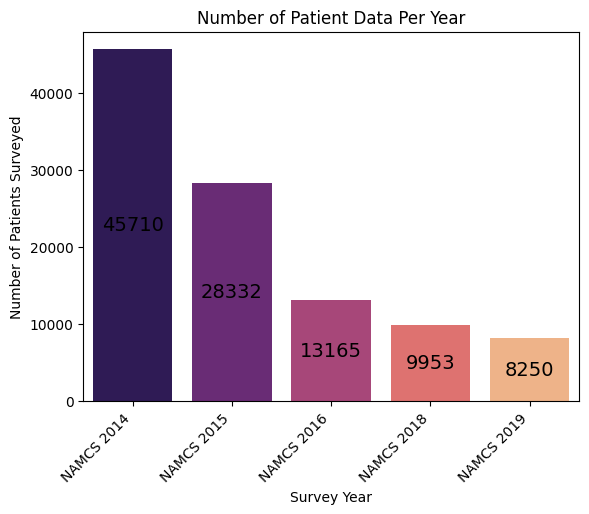

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_color_codes('muted')
chart = sns.barplot(x = name_list, y= row_count, palette='magma')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.bar_label(chart.containers[0], size=14, label_type='center')
plt.xlabel('Survey Year')
plt.ylabel('Number of Patients Surveyed')
plt.title('Number of Patient Data Per Year')

One thing that stands out is the amount of characteristics provided for each of the years provided (Around a thousand for each!). At this point, I'm going to refer to the NAMCS documentation for the sets in order to get a list of the columns for each of the dataset. The CDC provides different input and formatting files for the SAS files that lists all the characteristics available for each year. (https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NAMCS/sas/). Here are some of the features that can be used later for further analysis:

- Numeric Features
    - AGE - age
    - BMI - Body Mass Index
    - BPSYS - Systolic Blood Pressure
    - BPDIAS - Diastolic Blood Pressure
    - WTLB - Weight in Pounds
    - HTIN - Height in Inches
    - TEMPF - Temperature

   <br>

 - Categorical Features
    - SEX - Sex 
    - RACERETH - Race/ethnicity - imputed
    - RACEUN - Race Unimputed
    - OBESITY - Is Patient Obese
    - DIABTYP1 - Does the patient have Diabetes Type 1
    - DIABTYP2 - Does the patient have Diabetes Type 2
    - DIABTYP0 - Does the patient have Diabetes Unspecified
    - DEPRN - Does the patient have Depression
    - USETOBAC - Does the patient use tobacco
    - HYPLIPID - Does patient now have: Hyperlipidemia
    - HTN - Does the patient have Hypertension
    - CAD - Does patient now have: coronary artery disease (CAD), ischemic heart disease (IHD) or history of myocardial infarction (MI)
    - CKD - Does patient now have: chronic kidney disease? (CKD)
    - CANCER - Does patient now have: Cancer
    - AUTISM - Does the patient now have: Autism
    - CHF - Does the patient now have: Congestive heart failure
    - ETOHAB - Does patient now have: alcohol misuse, abuse or dependence
    - ASTHMA - Does patient now have: Asthma



First thing I would like to look at is the amount of Male vs Female patient data available and also the race data available to get an idea of who (if we were going to) we are going to make assumptions about. I'm going to be looking at RACEUN and SEX features in the dataset.

In [4]:
#Race dictionary contains the values from the NAMCS format SAS file provided on the CDC FTP server

race_dict = {1: "White Only",
             2:"Black/African American Only",
             3:"Asian Only",
             4:"Native Hawaiian / Other Pac Isl Only",
             5:"American Indian / Alaskan Native Only",
             6:"More than One Race Reported",
             -9:"Blank"}

#For each sheet name that starts with NAMCS we will go through the rows and get the count for each race including the blank
for sheet_name in namcs_all_sheet_names:
    if sheet_name.startswith('NAMCS'):
        df = pd.read_excel(namcs_all_file, sheet_name=sheet_name)
        print(f'----Patient Race -- unimputed for {sheet_name}-----')
        race_keys = df['RACEUN'].value_counts().keys().sort_values().tolist()
        for key in race_keys:
            print(f"{race_dict[key]}: ", f"{df['RACEUN'].value_counts()[key]}")
    else:
        break

----Patient Race -- unimputed for NAMCS 2014-----
Blank:  12295
White Only:  28604
Black/African American Only:  3207
Asian Only:  1182
Native Hawaiian / Other Pac Isl Only:  125
American Indian / Alaskan Native Only:  152
More than One Race Reported:  145
----Patient Race -- unimputed for NAMCS 2015-----
Blank:  7319
White Only:  17933
Black/African American Only:  2093
Asian Only:  808
Native Hawaiian / Other Pac Isl Only:  44
American Indian / Alaskan Native Only:  77
More than One Race Reported:  58
----Patient Race -- unimputed for NAMCS 2016-----
Blank:  3649
White Only:  8145
Black/African American Only:  931
Asian Only:  344
Native Hawaiian / Other Pac Isl Only:  21
American Indian / Alaskan Native Only:  53
More than One Race Reported:  22
----Patient Race -- unimputed for NAMCS 2018-----
Blank:  2843
White Only:  6134
Black/African American Only:  534
Asian Only:  355
Native Hawaiian / Other Pac Isl Only:  28
American Indian / Alaskan Native Only:  34
More than One Race Repor

In [5]:
for sheet_name in namcs_all_sheet_names:
    if sheet_name.startswith('NAMCS'):
        df = pd.read_excel(namcs_all_file, sheet_name=sheet_name)
        print(f"------Number of Patients by Sex per Survey Year---------{sheet_name}")
        print(f"Female:{df['SEX'].value_counts()[1]} ")
        print(f"Male:{df['SEX'].value_counts()[2]} ")



------Number of Patients by Sex per Survey Year---------NAMCS 2014
Female:26137 
Male:19573 
------Number of Patients by Sex per Survey Year---------NAMCS 2015
Female:15818 
Male:12514 
------Number of Patients by Sex per Survey Year---------NAMCS 2016
Female:7397 
Male:5768 
------Number of Patients by Sex per Survey Year---------NAMCS 2018
Female:5613 
Male:4340 
------Number of Patients by Sex per Survey Year---------NAMCS 2019
Female:4609 
Male:3641 


I worked for a few years as a pharmacy technician and one of the things that I had always been interested in was the amount of controlled substance / opiod prescriptions we would process on a daily / monthly basis. Using the table of opiod medications listed above, I included a list of each code and corresponding generic drug name in the last worksheet of the workbook we have been using. The dataset also includes 30 MED features that each contain a code for the medications that the patient is taking. The following code goes through each of the columns that starts with MED to see if any row contains at least one of the codes from the opiod list. If it does, then the row will be written into a new worksheet for its corresponding year. 

<br>
<br>

The new workbook is named "controls" as the medications on the list are controlled substances. This section is commented out as I don't want it to run every time we run this notebook, but leaving it just to show the code executed to create the worksheet.

In [6]:
# import pandas as pd

# #Read in excel file with all data sheets an
# excel_file = pd.ExcelFile("NAMCS14.19_drug_list.xlsx")
# sheet_names = excel_file.sheet_names

# #The drug list sheet has list of codes that represent Opiod drugs in NAMCS database
# opiods = pd.read_excel(excel_file, sheet_name="Drug List")['Drug Code'].to_list()

# for sheet_name in sheet_names:
#     # read the sheet into a dataframe
#     df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
#     # get all rows where any control value appears in a column that starts with 'MED'
#     med_cols = [col for col in df.columns.astype(str) if col.startswith('MED')]
#     mask = df[med_cols].isin(opiods).any(axis=1)
#     search_result = df[mask]
#     new_sheet_name = sheet_name + '_matching_controls'
#     with pd.ExcelWriter('namcs/controls.xlsx', mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
#         search_result.to_excel(writer, sheet_name=new_sheet_name, index=False)

Here is the patient race data for the 'controls' excel sheet and visualization as well.

In [7]:
race_dict = {1: "White Only",
             2:"Black/African American Only",
             3:"Asian Only",
             4:"Native Hawaiian / Other Pac Isl Only",
             5:"American Indian / Alaskan Native Only",
             6:"More than One Race Reported",
             -9:"Blank"}
namcs_opiods_file = pd.ExcelFile("namcs/controls.xlsx")
opiod_sheet_names = namcs_opiods_file.sheet_names
for sheet_name in opiod_sheet_names:
        if sheet_name.startswith('NAMCS'):
            df = pd.read_excel(namcs_opiods_file, sheet_name=sheet_name)
            print(f"-----------------YEAR:{sheet_name}- PATIENT RACE - PRESCRIBED AT LEAST ONE OPIOD----------------------")
            race_keys = df['RACEUN'].value_counts().keys().sort_values().tolist()
            for key in race_keys:
                  print(f"{race_dict[key]}: ", f"{df['RACEUN'].value_counts()[key]}")

-----------------YEAR:NAMCS 2014- PATIENT RACE - PRESCRIBED AT LEAST ONE OPIOD----------------------
Blank:  1027
White Only:  2696
Black/African American Only:  317
Asian Only:  41
Native Hawaiian / Other Pac Isl Only:  11
American Indian / Alaskan Native Only:  18
More than One Race Reported:  7
-----------------YEAR:NAMCS 2015- PATIENT RACE - PRESCRIBED AT LEAST ONE OPIOD----------------------
Blank:  402
White Only:  1218
Black/African American Only:  181
Asian Only:  43
Native Hawaiian / Other Pac Isl Only:  1
American Indian / Alaskan Native Only:  9
More than One Race Reported:  2
-----------------YEAR:NAMCS 2016- PATIENT RACE - PRESCRIBED AT LEAST ONE OPIOD----------------------
Blank:  218
White Only:  546
Black/African American Only:  54
Asian Only:  5
Native Hawaiian / Other Pac Isl Only:  2
American Indian / Alaskan Native Only:  7
More than One Race Reported:  2
-----------------YEAR:NAMCS 2018- PATIENT RACE - PRESCRIBED AT LEAST ONE OPIOD----------------------
Blank:  118

# Visualization


Number of rows in NAMCS 2014: 4117
Number of rows in NAMCS 2015: 1856
Number of rows in NAMCS 2016: 834
Number of rows in NAMCS 2018: 428
Number of rows in NAMCS 2019: 389


<function matplotlib.pyplot.show(close=None, block=None)>

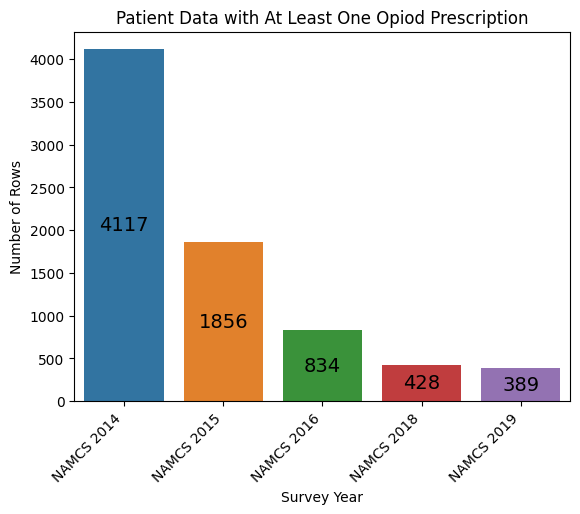

In [8]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

namcs_opiods_file = pd.ExcelFile("namcs/controls.xlsx")
opiod_sheet_names = namcs_opiods_file.sheet_names

row_count= []
name_list = []
for sheet_name in opiod_sheet_names:
     if sheet_name.startswith('NAMCS'):
        df = pd.read_excel(namcs_opiods_file, sheet_name=sheet_name)
        row_count.append(len(df))
        name_list.append(sheet_name)
        print(f"Number of rows in {sheet_name}: {len(df)}")


chart_opiod = sns.barplot(x = name_list, y= row_count)
chart_opiod.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.bar_label(chart_opiod.containers[0], size=14, label_type='center')

plt.xlabel('Survey Year')
plt.ylabel('Number of Rows')
plt.title('Patient Data with At Least One Opiod Prescription')
plt.show

Here is the Male vs Female count for all the data available in the "controls" excel file.

In [9]:
for sheet_name in opiod_sheet_names:
    if sheet_name.startswith('NAMCS'):
        df = pd.read_excel(namcs_opiods_file, sheet_name=sheet_name)
        print(f"------Number of Patients by Sex per Survey Year---------{sheet_name}")
        print(f"Female:{df['SEX'].value_counts()[1]} ")
        print(f"Male:{df['SEX'].value_counts()[2]} ")

------Number of Patients by Sex per Survey Year---------NAMCS 2014
Female:2374 
Male:1743 
------Number of Patients by Sex per Survey Year---------NAMCS 2015
Female:1021 
Male:835 
------Number of Patients by Sex per Survey Year---------NAMCS 2016
Female:443 
Male:391 
------Number of Patients by Sex per Survey Year---------NAMCS 2018
Female:240 
Male:188 
------Number of Patients by Sex per Survey Year---------NAMCS 2019
Female:193 
Male:196 


And here is the RACEUN Data for the 'controls' worksheets.

In [10]:
race_dict = {1: "White Only",
             2:"Black/African American Only",
             3:"Asian Only",
             4:"Native Hawaiian / Other Pac Isl Only",
             5:"American Indian / Alaskan Native Only",
             6:"More than One Race Reported",
             -9:"Blank"}
namcs_opiods_file = pd.ExcelFile("namcs/controls.xlsx")
opiod_sheet_names = namcs_opiods_file.sheet_names
for sheet_name in opiod_sheet_names:
        if sheet_name.startswith('NAMCS'):
            df = pd.read_excel(namcs_opiods_file, sheet_name=sheet_name)
            print(f"-----------------YEAR:{sheet_name}- PATIENT RACE - PRESCRIBED AT LEAST ONE OPIOD----------------------")
            race_keys = df['RACEUN'].value_counts().keys().sort_values().tolist()
            for key in race_keys:
                  print(f"{race_dict[key]}: ", f"{df['RACEUN'].value_counts()[key]}")



-----------------YEAR:NAMCS 2014- PATIENT RACE - PRESCRIBED AT LEAST ONE OPIOD----------------------
Blank:  1027
White Only:  2696
Black/African American Only:  317
Asian Only:  41
Native Hawaiian / Other Pac Isl Only:  11
American Indian / Alaskan Native Only:  18
More than One Race Reported:  7
-----------------YEAR:NAMCS 2015- PATIENT RACE - PRESCRIBED AT LEAST ONE OPIOD----------------------
Blank:  402
White Only:  1218
Black/African American Only:  181
Asian Only:  43
Native Hawaiian / Other Pac Isl Only:  1
American Indian / Alaskan Native Only:  9
More than One Race Reported:  2
-----------------YEAR:NAMCS 2016- PATIENT RACE - PRESCRIBED AT LEAST ONE OPIOD----------------------
Blank:  218
White Only:  546
Black/African American Only:  54
Asian Only:  5
Native Hawaiian / Other Pac Isl Only:  2
American Indian / Alaskan Native Only:  7
More than One Race Reported:  2
-----------------YEAR:NAMCS 2018- PATIENT RACE - PRESCRIBED AT LEAST ONE OPIOD----------------------
Blank:  118

# RACEUN vs RACERETH

At this point, looking at both the 'controls' file and the 'NAMCS14.19_drug_list', RACEUN provides a larger split of categories for each row, but a large percentage of the fields were left blank. Let's take a look at RACERETH and see how it differs from RACEUN. 

In [11]:
racereth_dict = {1:'Non-Hispanic White',
                 2:'Non-Hispanic Black',
                 3:'Hispanic',
                 4:'Non-Hispanic Other'}

for sheet_name in namcs_all_sheet_names:
    if sheet_name.startswith('NAMCS'):
        df = pd.read_excel(namcs_all_file, sheet_name=sheet_name)
        print(f'----Patient Race -- imputed for {sheet_name}-----')
        race_keys = df['RACERETH'].value_counts().keys().sort_values().tolist()
        for key in race_keys:
            print(f"{racereth_dict[key]}: ", f"{df['RACERETH'].value_counts()[key]}")
    else:
        break


namcs_opiods_file = pd.ExcelFile("namcs/controls.xlsx")
opiod_sheet_names = namcs_opiods_file.sheet_names
for sheet_name in opiod_sheet_names:
        if sheet_name.startswith('NAMCS'):
            df = pd.read_excel(namcs_opiods_file, sheet_name=sheet_name)
            print(f"-----------------YEAR:{sheet_name}- PATIENT RACE-IMPUTED - PRESCRIBED AT LEAST ONE OPIOD----------------------")
            race_keys = df['RACERETH'].value_counts().keys().sort_values().tolist()
            for key in race_keys:
                  print(f"{racereth_dict[key]}: ", f"{df['RACERETH'].value_counts()[key]}")
           
                  

----Patient Race -- imputed for NAMCS 2014-----
Non-Hispanic White:  35381
Non-Hispanic Black:  4006
Hispanic:  4275
Non-Hispanic Other:  2048
----Patient Race -- imputed for NAMCS 2015-----
Non-Hispanic White:  21531
Non-Hispanic Black:  2627
Hispanic:  2899
Non-Hispanic Other:  1275
----Patient Race -- imputed for NAMCS 2016-----
Non-Hispanic White:  9602
Non-Hispanic Black:  1194
Hispanic:  1744
Non-Hispanic Other:  625
----Patient Race -- imputed for NAMCS 2018-----
Non-Hispanic White:  7377
Non-Hispanic Black:  664
Hispanic:  1315
Non-Hispanic Other:  597
----Patient Race -- imputed for NAMCS 2019-----
Non-Hispanic White:  6159
Non-Hispanic Black:  695
Hispanic:  982
Non-Hispanic Other:  414
-----------------YEAR:NAMCS 2014- PATIENT RACE-IMPUTED - PRESCRIBED AT LEAST ONE OPIOD----------------------
Non-Hispanic White:  3346
Non-Hispanic Black:  389
Hispanic:  282
Non-Hispanic Other:  100
-----------------YEAR:NAMCS 2015- PATIENT RACE-IMPUTED - PRESCRIBED AT LEAST ONE OPIOD--------